In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,2273000.00
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,3600000.00
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,1200000.00
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,650000.00
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,1150000.00


In [4]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [5]:
data['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

# ¿Es mayor la correlacion metros cubiertos-precio cubiertos de una casa vs la de un departamento?

## metros-cubiertos vs precio de casas

In [6]:
data_houses = pd.DataFrame()
data_houses = data[ data['tipodepropiedad'] == 'Casa' ]
data_houses = data_houses.loc[:, ['precio', 'metroscubiertos']]
data_houses.head()

,precio,metroscubiertos
2,1200000.00,144.00
3,650000.00,63.00
6,1150000.00,140.00
7,4200000.00,293.00
10,488000.00,100.00


In [7]:
data_houses.shape

(141717, 2)

In [8]:
data_houses.isnull().sum().sum()

6532

In [9]:
(data_houses.isnull().sum().sum()) / (data_houses.shape[0]) * 100

4.609185912769815

In [10]:
data_houses.dropna(inplace = True)

In [11]:
data_houses.corr()

,precio,metroscubiertos
precio,1.00,0.75
metroscubiertos,0.75,1.00


## metros-cubiertos vs precio de departamentos

In [12]:
data_flat = pd.DataFrame()
data_flat = data[data['tipodepropiedad'] == 'Apartamento']
data_flat = data_flat.loc[:, ['precio', 'metroscubiertos']]
data_flat.head()

,precio,metroscubiertos
0,2273000.00,80.00
4,1150000.00,95.00
5,1100000.00,75.00
8,310000.00,58.00
11,7200000.00,256.00


In [13]:
data_flat.shape

(57341, 2)

In [14]:
data_flat.isnull().sum().sum()

823

In [15]:
(data_flat.isnull().sum().sum()) / (data_flat.shape[0]) * 100

1.4352731902129368

In [16]:
data_flat = data_flat.dropna()

In [17]:
data_flat.corr()

,precio,metroscubiertos
precio,1.00,0.75
metroscubiertos,0.75,1.00


Como conclusion al parecer la corrrelacion es la misma en caso de departamentos y casas.

## Metros-cubiertos vs precio de Terreno

In [18]:
data_land = pd.DataFrame()
data_land = data[ data['tipodepropiedad'] == 'Terreno' ]
data_land = data_land.loc[:, ['precio', 'metrostotales']]
#Uso metrostotales porque metroscubiertos tiene mas NULLs en este caso
data_land.head()

,precio,metrostotales
9,6200000.00,nan
18,794078.00,164.00
20,490000.00,105.00
57,1439000.00,323.00
125,720000.00,400.00


In [19]:
data_land.shape

(9945, 2)

In [20]:
(data_land.isnull().sum().sum()) / (data_land.shape[0]) * 100

12.770236299648063

In [21]:
data_land.dropna(inplace = True)

In [22]:
data_land.corr()

,precio,metrostotales
precio,1.00,0.25
metrostotales,0.25,1.00


Casi no hay correlacion en este caso... (Significativamente menos)

## Correlacion de cada grupo

In [23]:
df = data.dropna(subset = ['precio']).groupby(['tipodepropiedad'])['precio', 'metroscubiertos', 'metrostotales'].corr().reset_index()
df = df[ df['level_1'] == 'precio']
df

,tipodepropiedad,level_1,precio,metroscubiertos,metrostotales
0,Apartamento,precio,1.00,0.75,0.73
3,Bodega comercial,precio,1.00,0.20,0.32
6,Casa,precio,1.00,0.75,0.62
9,Casa en condominio,precio,1.00,0.79,0.62
12,Casa uso de suelo,precio,1.00,0.51,0.36
15,Departamento Compartido,precio,1.00,0.71,0.64
18,Duplex,precio,1.00,0.79,0.68
21,Edificio,precio,1.00,0.28,0.38
24,Garage,precio,nan,nan,nan
27,Hospedaje,precio,nan,nan,nan


In [24]:
data['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

Se eliminan los tipos de propiedades con menos de 100 apariciones porque son muy pocos.

In [25]:
df = df.drop(labels = [27, 24, 42, 30, 66, 45] )
df.sort_values(['metroscubiertos', 'metrostotales'], ascending = False, inplace = True)
df = df.set_index('tipodepropiedad')

## Comparamos estas correlaciones en una grafica:

Text(0, 0.5, 'Tipo de propiedad')

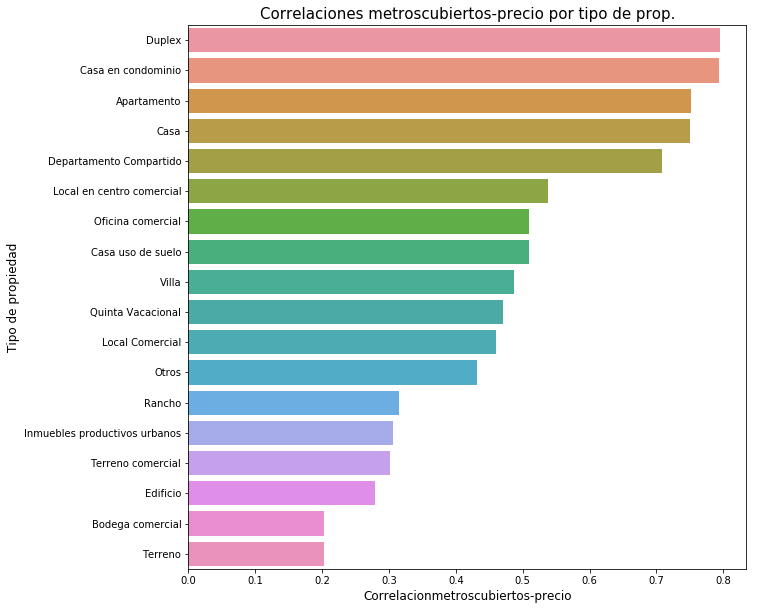

In [51]:
plt.figure(figsize=(10,10))
g = sns.barplot(x = df['metroscubiertos'], y=df.index)
g.set_title("Correlaciones metroscubiertos-precio por tipo de prop.", fontsize=15)
g.set_xlabel("Correlacionmetroscubiertos-precio", fontsize=12)
g.set_ylabel("Tipo de propiedad", fontsize=12)


### La misma grafica pero esta vez incluyendo a su vez metrostotales

<Figure size 720x720 with 0 Axes>

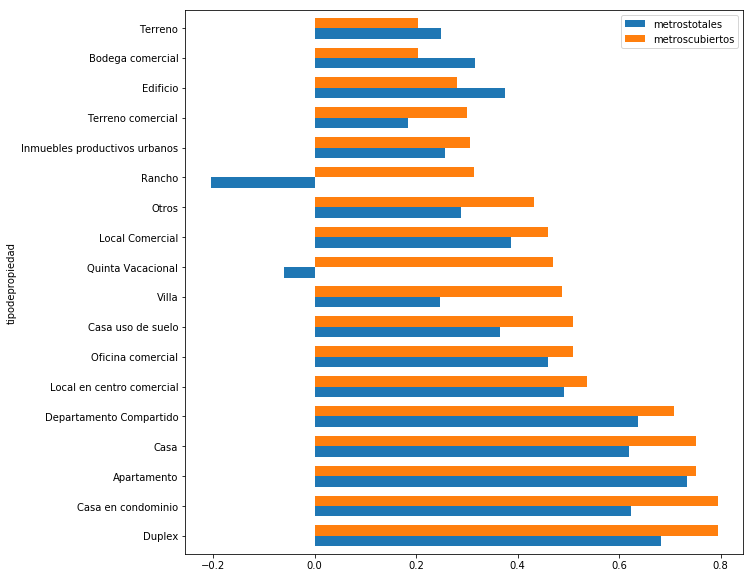

In [50]:
df2 = df.reset_index()
plt.figure(figsize = (10, 10))
df2.plot.barh(x='tipodepropiedad', y= ['metrostotales', 'metroscubiertos'], rot=0, figsize = (10, 10), width = 0.7)

### Como conlcusion podemos ver que segun el tipo de propiedad que sea la relacion metros-precio adquiere mayor o menor importancia.